In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

import pandas as pd

target = 'popularity'

features =  ['valence',
 'acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo']
data_path = "../data/decades_new/data_from_"

In [3]:
best_options = { "val" :  0.7354724934405781,  "ests" : 166,  "crit" : "gini", "depth" :  10 }

decades = [str(i) for i in range(20,100,10)]
decades.append("0")
decades.append("10")

decade_imps = {}
for decade in decades:    
    df = pd.read_csv(data_path + decade + "s.csv")
    
    X = df[features]
    y = df[target]

    forest_classifier = RandomForestClassifier(n_estimators=best_options["ests"], max_depth=best_options["depth"], criterion=best_options["crit"]) 

    forest_classifier.fit(X, y)
    
    feature_classifier_importances_df = pd.DataFrame(
        {"feature": features, "importance": forest_classifier.feature_importances_}
    ).sort_values("importance", ascending=False)
    
    decade_imps[decade] = feature_classifier_importances_df


In [4]:
feature_imps = {}
for feature in features:
    temp = []
    for decade in decades:
        temp_df = decade_imps[decade]
        temp_df2 = temp_df[temp_df["feature"] == feature]
        temp.append(temp_df2["importance"].iloc[0])        
            
    feature_imps[feature] = temp

In [5]:
feature_imps

{'valence': [0.0880240838976878,
  0.055857788198809974,
  0.0596586727091291,
  0.06149205581615245,
  0.08055667284713211,
  0.08698509437303428,
  0.08651492492131256,
  0.0873515275168935,
  0.08823447416551575,
  0.07832955967117268],
 'acousticness': [0.12729220409813305,
  0.10442107349136959,
  0.09104294675412812,
  0.19223827454990247,
  0.09875641422930215,
  0.09031834402934473,
  0.09320107751475765,
  0.08748923183421364,
  0.08778963229745104,
  0.09307851994470456],
 'artists': [0.18579508715849088,
  0.2729738579485827,
  0.2286149389478152,
  0.13157082800868347,
  0.14779923390346794,
  0.08679591223371262,
  0.08423350777317948,
  0.09083913441634835,
  0.08906937733519857,
  0.07510778082532583],
 'danceability': [0.0662989456648368,
  0.074536744911866,
  0.05936791849703002,
  0.07973072806495046,
  0.08036126552969046,
  0.08933199493685638,
  0.08948433574388866,
  0.08695139526898217,
  0.08824733803212861,
  0.09618499838215884],
 'duration_ms': [0.0779074537

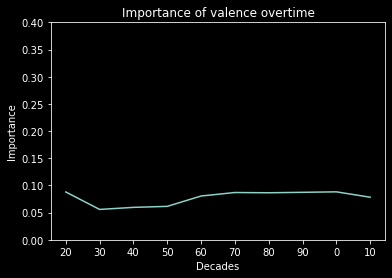

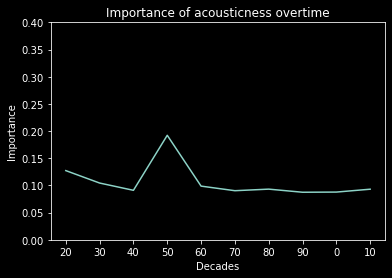

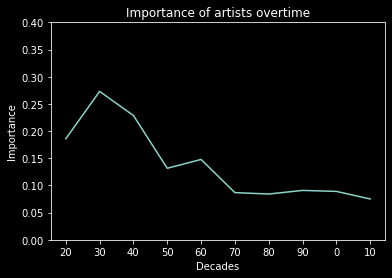

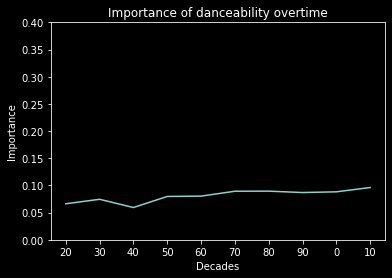

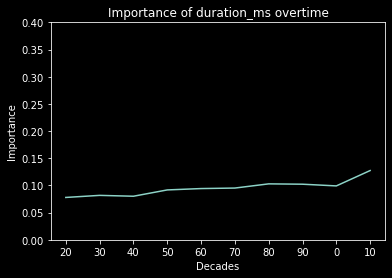

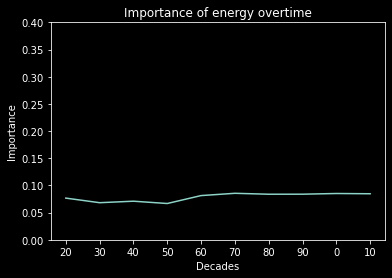

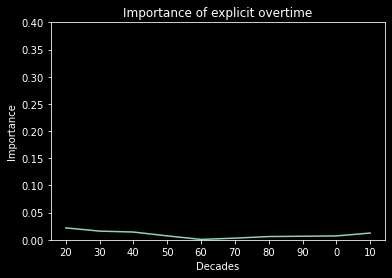

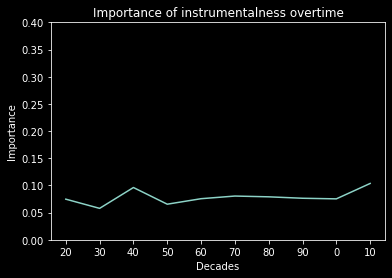

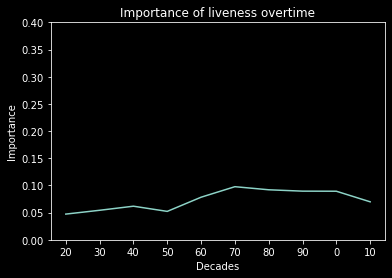

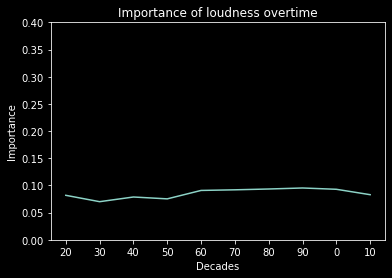

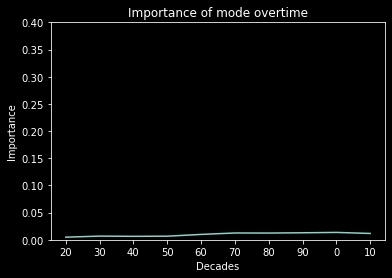

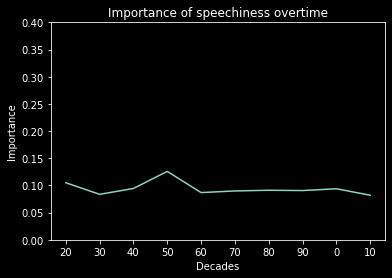

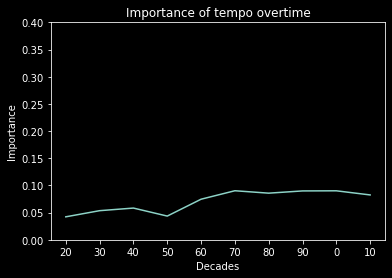

In [6]:
from matplotlib import style
style.use('dark_background')

for feature in features:
    plt.figure()
    plt.title(f"Importance of {feature} overtime")
    plt.xlabel("Decades")
    plt.ylabel("Importance")
    plt.ylim(top=0.4, bottom=0.0)
    plt.plot(decades, feature_imps[feature])